## 박정현

In [3]:
import pandas as pd
GB = pd.read_csv("C:/Temp/GBvideos.csv")
US = pd.read_csv("C:/Temp/USvideos.csv")

In [4]:
GB.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [5]:
GB.shape

(38916, 16)

In [6]:
import json

In [7]:
pd.read_json("C:/Temp/GB_category_id.json")

id_to_category = {}

with open('C:/Temp/GB_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

        
id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [8]:
id_to_category=pd.DataFrame(data ={'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'},index=['category'])

In [9]:
import numpy as np
id_to_category=np.transpose(id_to_category)
id_to_category

,category
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging
22,People & Blogs


In [10]:
id_to_category['index'] = id_to_category.index

In [11]:
id_to_category['index']=id_to_category['index'].astype(int)
GB['category_id']=GB['category_id'].astype(int)

In [12]:
GB=GB.merge(id_to_category ,left_on ='category_id',right_on='index')

In [13]:
#누락값 확인

In [14]:
GB.info() #description에 누락값 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38826 entries, 0 to 38825
Data columns (total 18 columns):
video_id                  38826 non-null object
trending_date             38826 non-null object
title                     38826 non-null object
channel_title             38826 non-null object
category_id               38826 non-null int32
publish_time              38826 non-null object
tags                      38826 non-null object
views                     38826 non-null int64
likes                     38826 non-null int64
dislikes                  38826 non-null int64
comment_count             38826 non-null int64
thumbnail_link            38826 non-null object
comments_disabled         38826 non-null bool
ratings_disabled          38826 non-null bool
video_error_or_removed    38826 non-null bool
description               38266 non-null object
category                  38826 non-null object
index                     38826 non-null int32
dtypes: bool(3), int32(2), int64(4), ob

In [15]:
GB["description"] = GB["description"].fillna(value="")

In [16]:
GB.describe()

,category_id,views,likes,dislikes,comment_count,index
count,38826.000000,3.882600e+04,3.882600e+04,3.882600e+04,3.882600e+04,38826.000000
mean,16.799722,5.916561e+06,1.342016e+05,7.490175e+03,1.292107e+04,16.799722
std,7.739501,1.901971e+07,3.490054e+05,5.039509e+04,4.955807e+04,7.739501
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,10.000000,2.520638e+05,5.917000e+03,2.000000e+02,6.800000e+02,10.000000
50%,20.000000,9.821230e+05,2.518350e+04,8.205000e+02,2.478000e+03,20.000000
75%,24.000000,3.692498e+06,1.142088e+05,3.361000e+03,9.264000e+03,24.000000
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,43.000000


In [17]:
import numpy as np
GB_cat_mean = GB.groupby('category').views.agg([min, max, np.std, np.mean]).sort_values(["mean"], ascending=[False])

print(GB_cat_mean.astype(int))

                         min        max       std      mean
category                                                   
Music                   2152  424538912  29574046  12444442
Entertainment           2650  169884583   9192802   3264607
Film & Animation        2441   42560014   6040443   3245132
Science & Technology   38353   21530325   5407728   3168703
Comedy                 10676   43460605   3410803   2167430
People & Blogs          1184   62338362   6731586   1966605
Sports                  1930   22975455   3745286   1752352
Autos & Vehicles        1858    5362914   1507791   1487392
Shows                 876996    1709880    251163   1429164
Travel & Events         3254    6362355   2197172   1383177
News & Politics          851   18994966   2750035   1150311
Pets & Animals         25232    6416920   1287336   1013708
Gaming                  7350   18158133   2211469    976856
Education               8851   11240174   2079594    972189
Howto & Style           1505    8721841 

In [18]:
def my_mean_diff(values, diff_value):
    n = len(values) 
    sum = 0 
    for value in values:
        sum += value 
    mean = sum / n 
    return mean - diff_value

In [19]:
global_mean = GB.views.mean() 
print(global_mean)

5916561.065059496


In [20]:
agg_mean_diff = GB.groupby('category').views.agg(my_mean_diff, diff_value=global_mean) 
print(agg_mean_diff.astype(int))

category
Autos & Vehicles       -4429168
Comedy                 -3749131
Education              -4944371
Entertainment          -2651953
Film & Animation       -2671428
Gaming                 -4939704
Howto & Style          -5299260
Music                   6527881
News & Politics        -4766249
People & Blogs         -3949955
Pets & Animals         -4902852
Science & Technology   -2747857
Shows                  -4487396
Sports                 -4164208
Travel & Events        -4533384
Name: views, dtype: int32


다른 동영상보다 조회수가 압도적으로 높은 동영상은 음악 동영상이었다. 교육, 생활정보등은 조회수가 적었다.

In [21]:
GB["proportion"] = GB["dislikes"]/GB["likes"]

In [22]:
GB_prop_mean = GB.groupby('category').proportion.agg([min,max,np.mean])

In [23]:
print(GB_prop_mean.sort_values(["mean"]))

                           min        max      mean
category                                           
Shows                 0.006760   0.008111  0.007617
Pets & Animals        0.002537   0.267240  0.035151
Travel & Events       0.000000   0.112676  0.036060
Music                 0.000000   4.353606  0.043104
Comedy                0.003037   0.353371  0.051882
Science & Technology  0.004091   0.908491  0.065394
Howto & Style         0.001649   9.800000  0.068425
Education             0.004533   0.422870  0.077640
Entertainment         0.000000   5.341328  0.096422
Film & Animation      0.000000  12.912844  0.153850
Sports                0.000000   5.125035  0.186333
Gaming                0.001178  32.365385  0.257763
Autos & Vehicles      0.007692   2.292446  0.266827
News & Politics       0.000000   7.847430  0.352954
People & Blogs        0.000000  25.445413  0.357765


좋아요수 대비 싫어요 수가높은것은 사람,뉴스 등이 많았다. 쇼나 동물에 대한 동영상이 좋아요수 대비 싫어요 수가 적었다.

## GRAPH

<Figure size 1008x432 with 0 Axes>

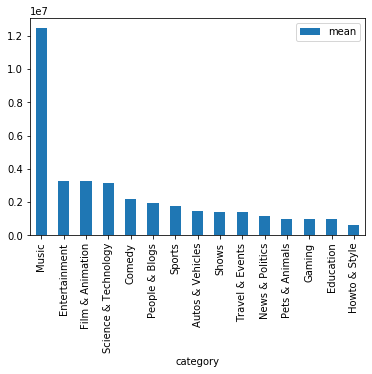

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

GB_cat_mean = pd.DataFrame(GB_cat_mean['mean'])
GB_cat_mean.plot.bar()


Music category의 조회수 평균이 압도적으로 높음을 확인할 수 있다. 이를 좀더 자세히 살펴보기 위해 boxplot을 그려보도록 하겠다.

In [92]:
GB['likes_log'] = np.log(GB['likes'] + 1)
GB['dislikes_log'] = np.log(GB['dislikes'] + 1)
GB['views_log'] = np.log(GB['views'] + 1)

my_order_likes = GB.groupby(by=["category"])["likes_log"].mean().iloc[::-1].sort_values(ascending=[False]).index
my_order_dislikes = GB.groupby(by=["category"])["dislikes_log"].mean().iloc[::-1].sort_values(ascending=[False]).index
my_order_views = GB.groupby(by=["category"])["views_log"].mean().iloc[::-1].sort_values(ascending=[False]).index

각 데이터의 범위의 차이가 크기 때문에 log를 씌워 정규화를 해준뒤, boxplot을 그릴 때 정렬 해줄 수 있도록 정렬된 index를 뽑아낸다.

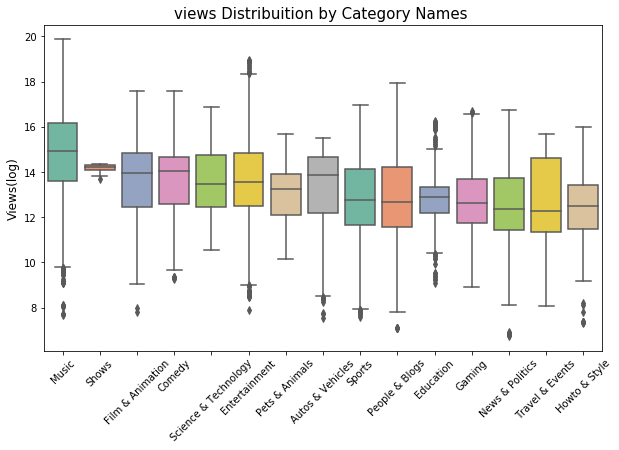

In [93]:
plt.figure(figsize = (10,6))
g = sns.boxplot(x='category', y='views_log', data=GB, palette="Set2",order=my_order_views)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("views Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Views(log)", fontsize=12)
plt.show()

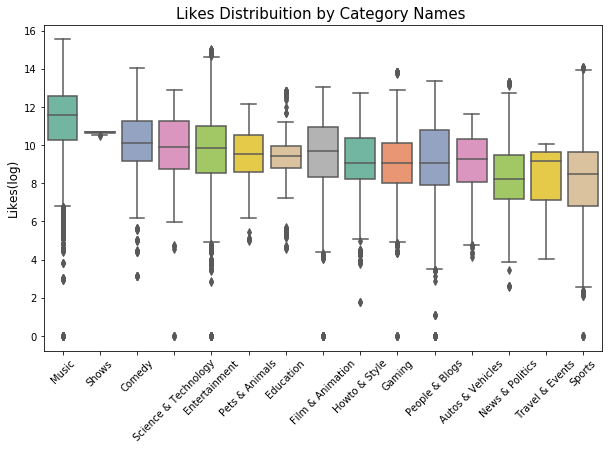

In [91]:
plt.figure(figsize = (10,6))
g = sns.boxplot(x='category', y='likes_log', data=GB, palette="Set2",order=my_order_likes)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

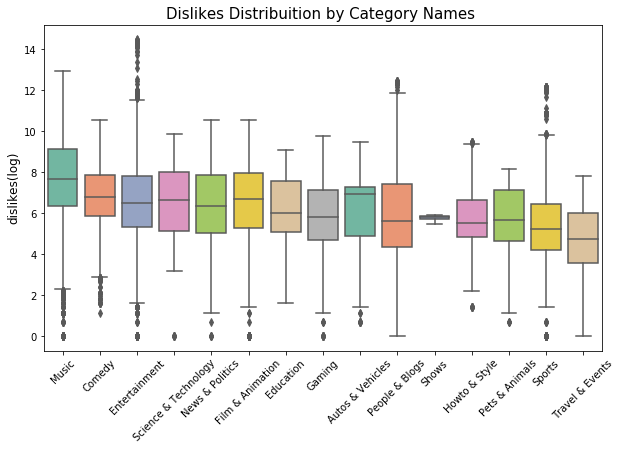

In [94]:
plt.figure(figsize = (10,6))
g = sns.boxplot(x='category', y='dislikes_log', data=GB, palette="Set2",order=my_order_dislikes)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("dislikes(log)", fontsize=12)
plt.show()

## 이연경

In [1]:
import pandas as pd
GB=pd.read_csv('C:/Users/SAMSUNG/Desktop/GBvideos.csv')
US=pd.read_csv('C:/Users/SAMSUNG/Desktop/USvideos.csv')

In [2]:
GB.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [3]:
gb1 = pd.DataFrame(GB.groupby("category_id")["likes"].mean())
gb2 = pd.DataFrame(GB.groupby("category_id")["likes"].min())
gb3 = pd.DataFrame(GB.groupby("category_id")["likes"].max())
gb4 = pd.DataFrame(GB.groupby("category_id")["comment_count"].mean())
gb5 = pd.DataFrame(GB.groupby("category_id")["comment_count"].min())
gb6 = pd.DataFrame(GB.groupby("category_id")["comment_count"].max())

In [4]:
gb1["index"] = gb1.index
gb2["index"] = gb2.index
gb3["index"] = gb3.index
gb4["index"] = gb4.index
gb5["index"] = gb5.index
gb6["index"] = gb6.index

In [5]:
data1=pd.concat([gb1,gb2,gb3], axis=1)
del data1['index']
data1.columns=['likes_mean','likes_min','likes_max']
data1

,likes_mean,likes_min,likes_max
category_id,,,
1,57205.523089,0,461135
2,24608.506944,61,114841
10,272138.508943,0,5613827
15,28629.913858,147,187524
17,39270.313057,0,1291139
19,9674.447917,54,23791
20,39220.127517,0,1031695
22,46273.495899,0,625174
23,78431.168490,22,1253154


In [6]:
data2=pd.concat([gb4,gb5,gb6], axis=1)
del data2['index']
data2.columns=['comment_count_mean','comment_count_min','comment_count_max']
data2

,comment_count_mean,comment_count_min,comment_count_max
category_id,,,
1,6049.674428,0,50255
2,3507.534722,0,12083
10,21303.849062,0,1228655
15,2630.520599,23,18532
17,5273.322496,0,91663
19,1231.010417,7,2716
20,3449.101790,0,31803
22,6395.471292,0,154958
23,9145.960613,4,205692


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Category ID별 likes(좋아요)의 평균, 최대, 최소 확인하기

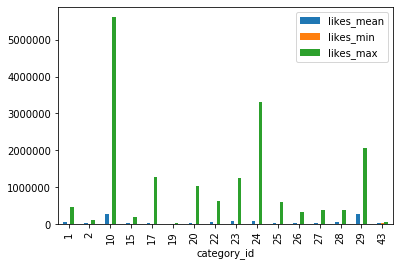

In [8]:
data1.plot.bar()

매우 큰 값이 있기 때문에 자세히 보기 위해 로그를 취한다

In [9]:
data1['likes_mean_log'] = np.log(data1['likes_mean'] + 1)
data1['likes_max_log'] = np.log(data1['likes_max'] + 1)
data1['likes_min_log'] = np.log(data1['likes_min'] + 1)

df1=data1[['likes_mean_log','likes_max_log','likes_min_log']]
df1

,likes_mean_log,likes_max_log,likes_min_log
category_id,,,
1,10.954423,13.041448,0.000000
2,10.110888,11.651313,4.127134
10,12.514070,15.540743,0.000000
15,10.262242,12.141667,4.997212
17,10.578250,14.071036,0.000000
19,9.177347,10.077105,4.007333
20,10.576971,13.846715,0.000000
22,10.742346,13.345787,0.000000
23,11.269989,14.041175,3.135494


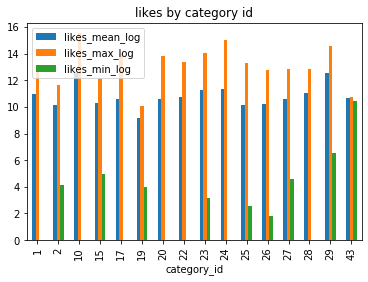

In [10]:
df1.plot.bar(title="likes by category id")

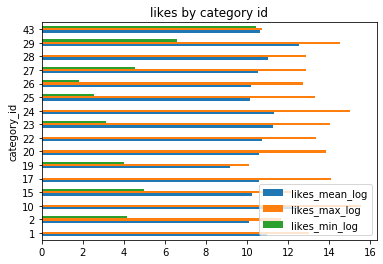

In [11]:
df1.plot.barh(title="likes by category id")

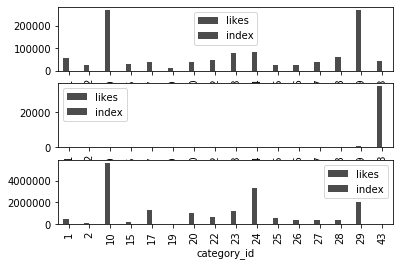

In [12]:
fig, axes = plt.subplots(3, 1)
gb1.plot.bar(ax=axes[0], color='k', alpha=0.7) 
gb2.plot.bar(ax=axes[1], color='k', alpha=0.7)
gb3.plot.bar(ax=axes[2], color='k', alpha=0.7)

카테고리 10에 해당하는 동영상의 좋아요 수가 가장 많다.

# Category ID별 comment_count(댓글 개수)의 평균, 최대, 최소 확인하기

In [13]:
data2['commentcount_mean_log'] = np.log(data2['comment_count_mean'] + 1)
data2['commentcount_max_log'] = np.log(data2['comment_count_max'] + 1)
data2['commentcount_min_log'] = np.log(data2['comment_count_min'] + 1)

df2=data2[['commentcount_mean_log','commentcount_max_log','commentcount_min_log']]
df2

,commentcount_mean_log,commentcount_max_log,commentcount_min_log
category_id,,,
1,8.707925,10.824885,0.000000
2,8.162954,9.399638,0.000000
10,9.966690,14.021431,0.000000
15,7.875317,9.827308,3.178054
17,8.570606,11.425885,0.000000
19,7.116403,7.907284,2.079442
20,8.146159,10.367347,0.000000
22,8.763502,11.950916,0.000000
23,9.121177,12.234140,1.609438


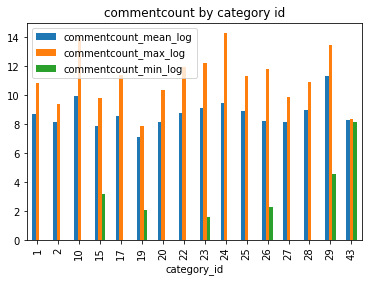

In [14]:
df2.plot.bar(title="commentcount by category id")

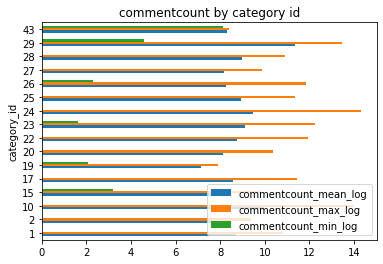

In [15]:
df2.plot.barh(title="commentcount by category id")

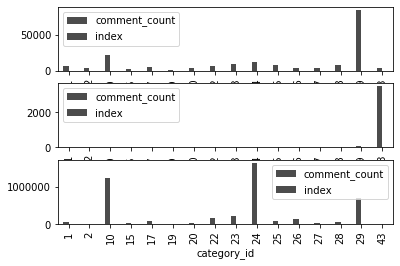

In [16]:
fig, axes = plt.subplots(3, 1)
gb4.plot.bar(ax=axes[0], color='k', alpha=0.7) 
gb5.plot.bar(ax=axes[1], color='k', alpha=0.7)
gb6.plot.bar(ax=axes[2], color='k', alpha=0.7)

카테고리 29번의 동영상에 댓글이 가장 많이 달렸다.

## 김지원

In [20]:
gb = GB.drop(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis=1)

In [21]:
us = US.drop(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis=1)

In [22]:
pd.concat([gb, us], axis=1)

,category_id,views,likes,dislikes,comment_count,category_id,views,likes,dislikes,comment_count
0,26.0,7224515.0,55681.0,10247.0,9479.0,22,748374,57527,2966,15954
1,24.0,1053632.0,25561.0,2294.0,2757.0,24,2418783,97185,6146,12703
2,10.0,17158579.0,787420.0,43420.0,125882.0,23,3191434,146033,5339,8181
3,17.0,27833.0,193.0,12.0,37.0,24,343168,10172,666,2146
4,25.0,9815.0,30.0,2.0,30.0,24,2095731,132235,1989,17518
5,24.0,1182775.0,52708.0,1431.0,2333.0,28,119180,9763,511,1434
6,10.0,33523622.0,1634124.0,21082.0,85067.0,24,2103417,15993,2445,1970
7,22.0,1164201.0,57309.0,749.0,624.0,28,817732,23663,778,3432
8,10.0,154494.0,2163.0,147.0,211.0,1,826059,3543,119,340
9,10.0,9548677.0,190084.0,15015.0,11473.0,25,256426,12654,1363,2368


In [23]:
us1 = pd.DataFrame(us.groupby("category_id")["likes"].mean())

In [24]:
gb1 = pd.DataFrame(gb.groupby("category_id")["likes"].mean())

In [25]:
us1["index"] = us1.index

In [26]:
gb1["index"] = gb1.index

In [27]:
us1['index']=us1['index'].astype(int)
gb1['index']=gb1['index'].astype(int)

In [28]:
data = gb1.merge(us1,left_on = "category_id", right_on = "index")

In [29]:
data["differrence"] = data["likes_x"] - data["likes_y"]

In [30]:
data

,likes_x,index_x,likes_y,index_y,differrence
0,57205.523089,1,70787.836247,1,-13582.313158
1,24608.506944,2,11056.395833,2,13552.111111
2,272138.508943,10,218918.199011,10,53220.309932
3,28629.913858,15,21055.110870,15,7574.802988
4,39270.313057,17,45363.942502,17,-6093.629445
5,9674.447917,19,12030.462687,19,-2356.014770
6,39220.127517,20,84502.183599,20,-45282.056082
7,46273.495899,22,58135.825234,22,-11862.329335
8,78431.168490,23,62582.223315,23,15848.945175
9,81572.362012,24,53243.325070,24,28329.036942


In [36]:
US.relplot(x="video_id", y="likes", hue="category_id", style="cotegory_id", data=US)

AttributeError: 'DataFrame' object has no attribute 'relplot'

In [37]:
GB.relplot(x="video_id", y="likes", hue="category_id", style="cotegory_id", data=GB)

AttributeError: 'DataFrame' object has no attribute 'relplot'

## 김인지

In [18]:
comment_count_by_category_id = GB.groupby('category_id')['comment_count'].mean() 
print(comment_count_by_category_id)

category_id
1      6049.674428
2      3507.534722
10    21303.849062
15     2630.520599
17     5273.322496
19     1231.010417
20     3449.101790
22     6395.471292
23     9145.960613
24    12812.082420
25     7662.533878
26     3815.506224
27     3581.844639
28     7778.117761
29    85253.222222
43     4047.850000
Name: comment_count, dtype: float64


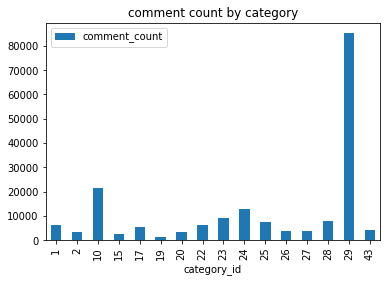

In [19]:
comment_count_by_category_id=pd.DataFrame(comment_count_by_category_id)
comment_count_by_category_id.plot.bar(title='comment count by category')

comment 평균의 수는 29번이 압도적으로 높았고 두번째로는 10번인 음악이 두드러졌으며, 24번 엔터테인트먼트가 높았다.
가장 코멘트 평균이 적은 건 19번 Travel & Event였다.